## EDA


Reading Amazon_Fashion_merged.parquet...
   rating               title_x  \
0     5.0         Pretty locket   
1     5.0                     A   
2     2.0             Two Stars   
3     1.0       Won’t buy again   
4     5.0  I LOVE these glasses   

                                                text images_x        asin  \
0  I think this locket is really pretty. The insi...       []  B00LOPVX74   
1                                              Great       []  B07B4JXK8D   
2  One of the stones fell out within the first 2 ...       []  B007ZSEQ4Q   
3  Crappy socks. Money wasted. Bought to wear wit...       []  B07F2BTFS9   
4  I LOVE these glasses!  They fit perfectly over...       []  B00PKRFU4O   

  parent_asin                       user_id      timestamp  helpful_vote  \
0  B00LOPVX74  AGBFYI2DDIKXC5Y4FARTYDTQBMFQ  1578528394489             3   
1  B07B4JXK8D  AFQLNQNQYFWQZPJQZS6V3NZU4QBQ  1608426246701             0   
2  B007ZSEQ4Q  AHITBJSS7KYUBVZPX7M2WJCOIVKQ  143234482800

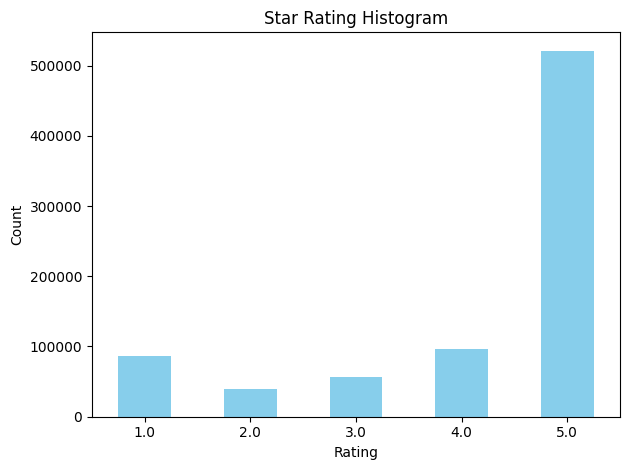

In [1]:
import glob
import os
import duckdb
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# Directory containing all your cleaned .parquet files
CLEANED_DIR = "/root/cleaned_parquets"
all_files = glob.glob(os.path.join(CLEANED_DIR, "*_merged.parquet"))

# Initialize rating counter
rating_counter = Counter()

# Loop through all files and collect rating data
for file in all_files:
    print(f"Reading {os.path.basename(file)}...")
    try:
        df = duckdb.sql(f"SELECT * FROM '{file}' LIMIT 50000").df()
        print(df.head())
        
        if 'rating' in df.columns:
            rating_counter.update(df['rating'].value_counts().to_dict())

    except Exception as e:
        print(f"Error reading {file}: {e}")

# Convert to Series and clean index
rating_series = pd.Series(rating_counter)
rating_series.index = pd.to_numeric(rating_series.index, errors='coerce')
rating_series = rating_series.dropna().sort_index()

# Plot histogram
if rating_series.empty:
    print("No valid rating data to plot.")
else:
    rating_series.plot(kind='bar', title='Star Rating Histogram', color='skyblue')
    plt.xlabel('Rating')
    plt.ylabel('Count')
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()


Analyzing review lengths in Amazon_Fashion_merged.parquet
Analyzing review lengths in Software_merged.parquet


Analyzing review lengths in Health_and_Personal_Care_merged.parquet
Analyzing review lengths in Musical_Instruments_merged.parquet
Analyzing review lengths in Home_and_Kitchen_merged.parquet
Error in /root/cleaned_parquets/Home_and_Kitchen_merged.parquet: Invalid Input Error: No magic bytes found at end of file '/root/cleaned_parquets/Home_and_Kitchen_merged.parquet'
Analyzing review lengths in Handmade_Products_merged.parquet
Analyzing review lengths in Unknown_merged.parquet
Error in /root/cleaned_parquets/Unknown_merged.parquet: Invalid Input Error: No magic bytes found at end of file '/root/cleaned_parquets/Unknown_merged.parquet'
Analyzing review lengths in Electronics_merged.parquet
Analyzing review lengths in Patio_Lawn_and_Garden_merged.parquet
Analyzing review lengths in Office_Products_merged.parquet
Analyzing review lengths in Kindle_Store_merged.parquet
Error in /root/cleaned_parquets/Kindle_Store_merged.parquet: Invalid Input Error: No magic bytes found at end of file '/ro

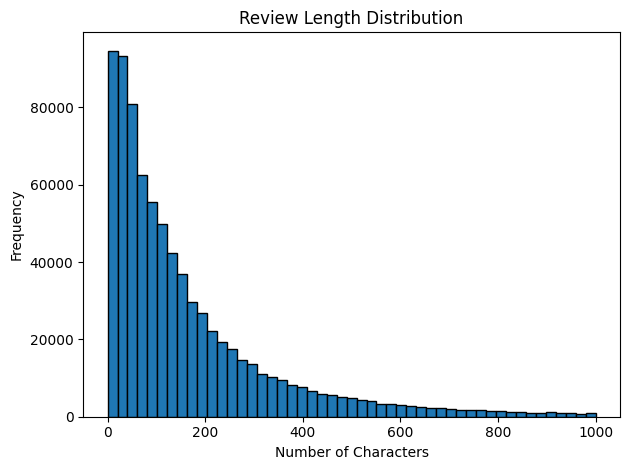

In [2]:
import glob
import os
import duckdb
import numpy as np
import matplotlib.pyplot as plt

CLEANED_DIR = "/root/cleaned_parquets"
all_files = glob.glob(os.path.join(CLEANED_DIR, "*_merged.parquet"))

lengths = []

for file in all_files:
    print(f"Analyzing review lengths in {os.path.basename(file)}")

    try:
        # Load in manageable chunks using DuckDB
        df = duckdb.sql(f"SELECT text FROM '{file}' WHERE text IS NOT NULL LIMIT 50000").df()
        if 'text' in df.columns:
            lengths.extend(df['text'].dropna().str.len().tolist())
    except Exception as e:
        print(f"Error in {file}: {e}")

# Plot Histogram
if lengths:
    plt.hist(lengths, bins=np.linspace(0, 1000, 50), edgecolor='black')
    plt.title("Review Length Distribution")
    plt.xlabel("Number of Characters")
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()
else:
    print("No review text lengths found to plot.")


Counting brands in Amazon_Fashion_merged.parquet
Error reading /root/cleaned_parquets/Amazon_Fashion_merged.parquet: Binder Error: Referenced column "brand" not found in FROM clause!
Candidate bindings: "rating", "rating_number", "user_id", "main_category", "parent_asin"
Counting brands in Software_merged.parquet
Counting brands in Health_and_Personal_Care_merged.parquet
Counting brands in Musical_Instruments_merged.parquet
Counting brands in Home_and_Kitchen_merged.parquet
Error reading /root/cleaned_parquets/Home_and_Kitchen_merged.parquet: Invalid Input Error: No magic bytes found at end of file '/root/cleaned_parquets/Home_and_Kitchen_merged.parquet'
Counting brands in Handmade_Products_merged.parquet


Counting brands in Unknown_merged.parquet
Error reading /root/cleaned_parquets/Unknown_merged.parquet: Invalid Input Error: No magic bytes found at end of file '/root/cleaned_parquets/Unknown_merged.parquet'
Counting brands in Electronics_merged.parquet
Counting brands in Patio_Lawn_and_Garden_merged.parquet
Counting brands in Office_Products_merged.parquet
Counting brands in Kindle_Store_merged.parquet
Error reading /root/cleaned_parquets/Kindle_Store_merged.parquet: Invalid Input Error: No magic bytes found at end of file '/root/cleaned_parquets/Kindle_Store_merged.parquet'
Counting brands in Clothing_Shoes_and_Jewelry_merged.parquet
Error reading /root/cleaned_parquets/Clothing_Shoes_and_Jewelry_merged.parquet: Invalid Input Error: No magic bytes found at end of file '/root/cleaned_parquets/Clothing_Shoes_and_Jewelry_merged.parquet'
Counting brands in Health_and_Household_merged.parquet
Counting brands in Movies_and_TV_merged.parquet
Error reading /root/cleaned_parquets/Movies_and_T

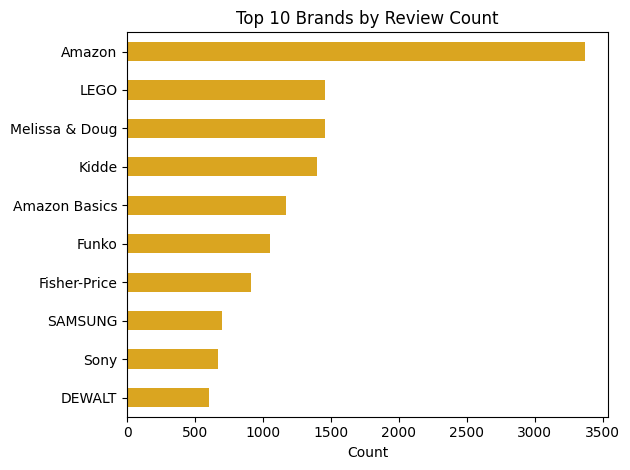

In [3]:
import glob
import os
import duckdb
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# Set your cleaned folder
CLEANED_DIR = "/root/cleaned_parquets"
all_files = glob.glob(os.path.join(CLEANED_DIR, "*_merged.parquet"))

brand_counter = Counter()

for file in all_files:
    print(f"Counting brands in {os.path.basename(file)}")

    try:
        df = duckdb.sql(f"""
            SELECT brand FROM '{file}'
            WHERE brand IS NOT NULL AND brand != 'Unknown'
            LIMIT 50000
        """).df()

        if 'brand' in df.columns:
            brand_counter.update(df['brand'].value_counts().to_dict())

    except Exception as e:
        print(f"Error reading {file}: {e}")

# Plot top 10 brands
top_brands = pd.Series(brand_counter).sort_values(ascending=False).head(10)
top_brands.plot(kind='barh', title='Top 10 Brands by Review Count', color='goldenrod')
plt.xlabel('Count')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


Analyzing categories in Amazon_Fashion_merged.parquet
Analyzing categories in Software_merged.parquet
Analyzing categories in Health_and_Personal_Care_merged.parquet
Analyzing categories in Musical_Instruments_merged.parquet
Analyzing categories in Home_and_Kitchen_merged.parquet
Error: Invalid Input Error: No magic bytes found at end of file '/root/cleaned_parquets/Home_and_Kitchen_merged.parquet'
Analyzing categories in Handmade_Products_merged.parquet
Analyzing categories in Unknown_merged.parquet
Error: Invalid Input Error: No magic bytes found at end of file '/root/cleaned_parquets/Unknown_merged.parquet'
Analyzing categories in Electronics_merged.parquet


Analyzing categories in Patio_Lawn_and_Garden_merged.parquet
Analyzing categories in Office_Products_merged.parquet
Analyzing categories in Kindle_Store_merged.parquet
Error: Invalid Input Error: No magic bytes found at end of file '/root/cleaned_parquets/Kindle_Store_merged.parquet'
Analyzing categories in Clothing_Shoes_and_Jewelry_merged.parquet
Error: Invalid Input Error: No magic bytes found at end of file '/root/cleaned_parquets/Clothing_Shoes_and_Jewelry_merged.parquet'
Analyzing categories in Health_and_Household_merged.parquet
Analyzing categories in Movies_and_TV_merged.parquet
Error: Invalid Input Error: No magic bytes found at end of file '/root/cleaned_parquets/Movies_and_TV_merged.parquet'
Analyzing categories in Grocery_and_Gourmet_Food_merged.parquet
Analyzing categories in Pet_Supplies_merged.parquet
Analyzing categories in Industrial_and_Scientific_merged.parquet
Analyzing categories in Sports_and_Outdoors_merged.parquet
Analyzing categories in Toys_and_Games_merged.p

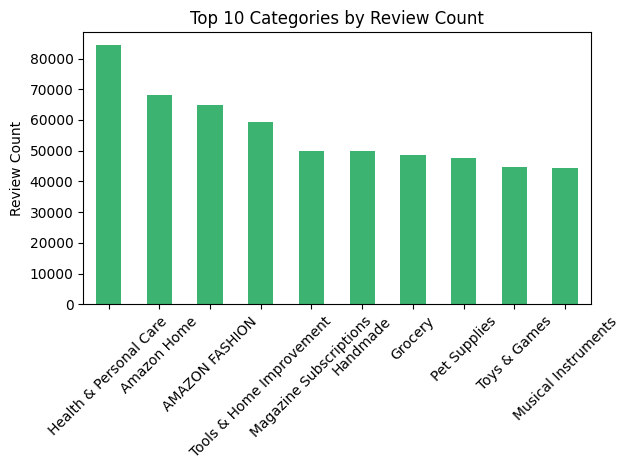

In [4]:
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt

category_counter = Counter()

for file in all_files:
    print(f"Analyzing categories in {os.path.basename(file)}")
    try:
        df = duckdb.sql(f"SELECT main_category FROM '{file}' WHERE main_category IS NOT NULL LIMIT 50000").df()
        category_counter.update(df['main_category'].value_counts().to_dict())
    except Exception as e:
        print(f"Error: {e}")

# Plot top 10
category_series = pd.Series(category_counter).sort_values(ascending=False).head(10)
category_series.plot(kind='bar', title='Top 10 Categories by Review Count', color='mediumseagreen')
plt.ylabel("Review Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Reading years in Amazon_Fashion_merged.parquet
Error: Binder Error: Referenced column "year" not found in FROM clause!
Candidate bindings: "features", "author", "details", "user_id", "categories"
Reading years in Software_merged.parquet


Reading years in Health_and_Personal_Care_merged.parquet
Reading years in Musical_Instruments_merged.parquet
Reading years in Home_and_Kitchen_merged.parquet
Error: Invalid Input Error: No magic bytes found at end of file '/root/cleaned_parquets/Home_and_Kitchen_merged.parquet'
Reading years in Handmade_Products_merged.parquet
Reading years in Unknown_merged.parquet
Error: Invalid Input Error: No magic bytes found at end of file '/root/cleaned_parquets/Unknown_merged.parquet'
Reading years in Electronics_merged.parquet
Reading years in Patio_Lawn_and_Garden_merged.parquet
Reading years in Office_Products_merged.parquet
Reading years in Kindle_Store_merged.parquet
Error: Invalid Input Error: No magic bytes found at end of file '/root/cleaned_parquets/Kindle_Store_merged.parquet'
Reading years in Clothing_Shoes_and_Jewelry_merged.parquet
Error: Invalid Input Error: No magic bytes found at end of file '/root/cleaned_parquets/Clothing_Shoes_and_Jewelry_merged.parquet'
Reading years in Heal

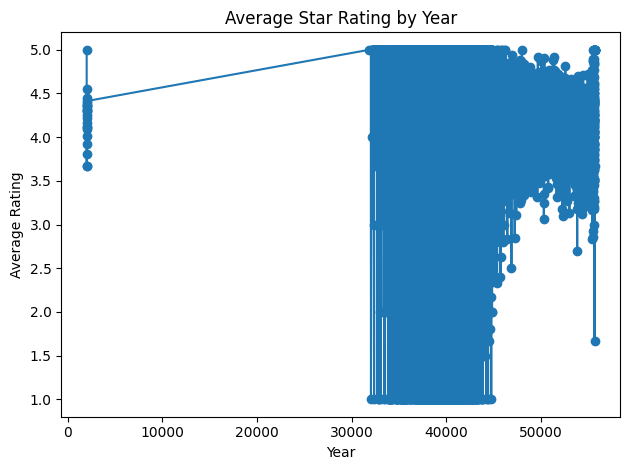

In [5]:
from collections import defaultdict

sum_by_year = defaultdict(float)
count_by_year = defaultdict(int)

for file in all_files:
    print(f"Reading years in {os.path.basename(file)}")
    try:
        df = duckdb.sql(f"SELECT year, rating FROM '{file}' WHERE year IS NOT NULL AND rating BETWEEN 1 AND 5 LIMIT 50000").df()
        grouped = df.groupby('year')['rating'].agg(['sum', 'count'])
        for year, row in grouped.iterrows():
            sum_by_year[year] += row['sum']
            count_by_year[year] += row['count']
    except Exception as e:
        print(f"Error: {e}")

# Create series and plot
years = sorted(sum_by_year.keys())
avg_ratings = [sum_by_year[y]/count_by_year[y] for y in years]

pd.Series(avg_ratings, index=years).plot(marker='o', title='Average Star Rating by Year')
plt.ylabel('Average Rating')
plt.xlabel('Year')
plt.tight_layout()
plt.show()


Counting brands in Amazon_Fashion_merged.parquet
Error: Binder Error: Referenced column "brand" not found in FROM clause!
Candidate bindings: "rating", "rating_number", "user_id", "main_category", "parent_asin"
Counting brands in Software_merged.parquet
Counting brands in Health_and_Personal_Care_merged.parquet
Counting brands in Musical_Instruments_merged.parquet
Counting brands in Home_and_Kitchen_merged.parquet
Error: Invalid Input Error: No magic bytes found at end of file '/root/cleaned_parquets/Home_and_Kitchen_merged.parquet'
Counting brands in Handmade_Products_merged.parquet
Counting brands in Unknown_merged.parquet
Error: Invalid Input Error: No magic bytes found at end of file '/root/cleaned_parquets/Unknown_merged.parquet'
Counting brands in Electronics_merged.parquet
Counting brands in Patio_Lawn_and_Garden_merged.parquet


Counting brands in Office_Products_merged.parquet
Counting brands in Kindle_Store_merged.parquet
Error: Invalid Input Error: No magic bytes found at end of file '/root/cleaned_parquets/Kindle_Store_merged.parquet'
Counting brands in Clothing_Shoes_and_Jewelry_merged.parquet
Error: Invalid Input Error: No magic bytes found at end of file '/root/cleaned_parquets/Clothing_Shoes_and_Jewelry_merged.parquet'
Counting brands in Health_and_Household_merged.parquet
Counting brands in Movies_and_TV_merged.parquet
Error: Invalid Input Error: No magic bytes found at end of file '/root/cleaned_parquets/Movies_and_TV_merged.parquet'
Counting brands in Grocery_and_Gourmet_Food_merged.parquet
Counting brands in Pet_Supplies_merged.parquet
Counting brands in Industrial_and_Scientific_merged.parquet
Counting brands in Sports_and_Outdoors_merged.parquet
Counting brands in Toys_and_Games_merged.parquet
Counting brands in Tools_and_Home_Improvement_merged.parquet
Counting brands in Magazine_Subscriptions_m

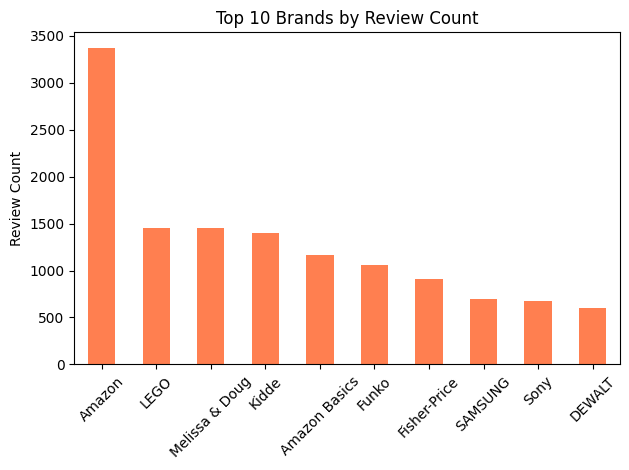

In [6]:
brand_counter = Counter()

for file in all_files:
    print(f"Counting brands in {os.path.basename(file)}")
    try:
        df = duckdb.sql(f"SELECT brand FROM '{file}' WHERE brand IS NOT NULL AND brand != 'Unknown' LIMIT 50000").df()
        brand_counter.update(df['brand'].value_counts().to_dict())
    except Exception as e:
        print(f"Error: {e}")

brand_series = pd.Series(brand_counter).sort_values(ascending=False).head(10)
brand_series.plot(kind='bar', title='Top 10 Brands by Review Count', color='coral')
plt.ylabel("Review Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
import glob
import os
import duckdb
import pandas as pd
import matplotlib.pyplot as plt

# Path to your cleaned parquet folder
CLEANED_DIR = "/root/cleaned_parquets"
all_files = glob.glob(os.path.join(CLEANED_DIR, "*_merged.parquet"))

lengths = []
ratings = []

for file in all_files:
    print(f"Sampling from {os.path.basename(file)}")

    try:
        df = duckdb.sql(f"""
            SELECT rating, text FROM '{file}'
            WHERE rating IS NOT NULL AND text IS NOT NULL
            LIMIT 100000
        """).df()

        lengths.extend(df['text'].str.len().tolist())
        ratings.extend(df['rating'].tolist())

    except Exception as e:
        print(f"Error: {e}")

# Compute correlation
if lengths and ratings:
    corr = pd.Series(lengths).corr(pd.Series(ratings))
    print(f"Pearson correlation between review length and rating: {corr:.4f}")

    # Optional: Visualize the trend with scatter
    plt.scatter(lengths, ratings, alpha=0.05)
    plt.title("Review Length vs Star Rating")
    plt.xlabel("Review Length (characters)")
    plt.ylabel("Rating")
    plt.tight_layout()
    plt.show()
else:
    print("Not enough data to compute correlation.")


Sampling from Amazon_Fashion_merged.parquet


Sampling from Software_merged.parquet
Sampling from Health_and_Personal_Care_merged.parquet
Sampling from Musical_Instruments_merged.parquet
Sampling from Home_and_Kitchen_merged.parquet
Error: Invalid Input Error: No magic bytes found at end of file '/root/cleaned_parquets/Home_and_Kitchen_merged.parquet'
Sampling from Handmade_Products_merged.parquet
Sampling from Unknown_merged.parquet
Error: Invalid Input Error: No magic bytes found at end of file '/root/cleaned_parquets/Unknown_merged.parquet'
Sampling from Electronics_merged.parquet
Sampling from Patio_Lawn_and_Garden_merged.parquet
Sampling from Office_Products_merged.parquet
Sampling from Kindle_Store_merged.parquet
Error: Invalid Input Error: No magic bytes found at end of file '/root/cleaned_parquets/Kindle_Store_merged.parquet'
Sampling from Clothing_Shoes_and_Jewelry_merged.parquet
Error: Invalid Input Error: No magic bytes found at end of file '/root/cleaned_parquets/Clothing_Shoes_and_Jewelry_merged.parquet'
Sampling from